## Introduction

This is a brief exploratory data analysis using Pandas for a given public sample of random Reddit posts.
We will get a feel of a dataset and try to answer the following questions: 
* What are the most popular reddits? Which topics are viral?
* Which posts have been removed and why? 
* What % removed reddits are deleted by moderatos? 
* Who are the most popular authors? 
* Who are the biggest spammers at Reddit platform?


In [ ]:
!pip install pandasql

In [3]:
!pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     ----------                              41.0/151.4 kB 1.9 MB/s eta 0:00:01
     ------------------------------         122.9/151.4 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 1.8 MB/s eta 0:00:00


In [4]:
#Getting all the packages we need: 

import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns #statist graph package
import matplotlib.pyplot as plt #plot package
import pandasql as ps #sql package
import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords

#Optional helpful plot stypes:
plt.style.use('bmh') #setting up 'bmh' as "Bayesian Methods for Hackers" style sheet
#plt.style.use('ggplot') #R ggplot stype
#print(plt.style.available) #pick another style


## <a name="read"></a>Reading the dataset
Accessing Reddit dataset:

In [9]:
df = pd.read_csv(r'C:\Users\gizzl\Desktop\r_dataisbeautiful_posts.csv',low_memory=False )


In [10]:
df.sample(5)

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
13507,ijo8w8,Bananas to survive per day,1,KurtiZ_TSW,NaN,moderator,0.0,[],1598834776,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
183579,1qpw3u,The Top-Downloaded Ringtone by Week since 2007...,6,Vizual-Statistix,Viz Practitioner,NaN,NaN,NaN,1384551242,https://www.reddit.com/r/dataisbeautiful/comme...,4,False
185976,1i1cf8,Data collected by Stasi from GDR citiziens com...,9,ralgrado,NaN,NaN,NaN,NaN,1373492857,https://www.reddit.com/r/dataisbeautiful/comme...,3,False
36684,fn7rst,[OC] COVID-19 cases by health regions in Canada,1,inwebitrust,OC: 14,NaN,0.0,[],1584913075,https://www.reddit.com/r/dataisbeautiful/comme...,5,False
32363,fxt8qf,"International tourism, spending in the euro area.",1,statistiques2020,NaN,moderator,0.0,[],1586441975,https://www.reddit.com/r/dataisbeautiful/comme...,1,False


In [11]:
df.tail(5)

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
190848,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,NaN,NaN,NaN,NaN,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
190849,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,NaN,NaN,NaN,NaN,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
190850,pq922,Wavii.,13,ddshroom,NaN,NaN,NaN,NaN,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
190851,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,NaN,NaN,NaN,NaN,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
190852,ppvl7,A map showing the geographical distribution of...,45,zanycaswell,NaN,NaN,NaN,NaN,1329263456,https://www.reddit.com/r/dataisbeautiful/comme...,5,False


In [12]:
print("Data shape :",df.shape)

Data shape : (190853, 12)


## <a name="feel"></a>Getting a feel of the dataset
Let's run basic dataframe exploratory commands

In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190853 entries, 0 to 190852
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     190853 non-null  object 
 1   title                  190852 non-null  object 
 2   score                  190853 non-null  int64  
 3   author                 190853 non-null  object 
 4   author_flair_text      28845 non-null   object 
 5   removed_by             20744 non-null   object 
 6   total_awards_received  65146 non-null   float64
 7   awarders               54478 non-null   object 
 8   created_utc            190853 non-null  int64  
 9   full_link              190853 non-null  object 
 10  num_comments           190853 non-null  int64  
 11  over_18                190853 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 16.2+ MB


,score,total_awards_received,created_utc,num_comments
count,190853.000000,65146.000000,1.908530e+05,190853.000000
mean,176.016159,0.013109,1.512494e+09,27.604732
std,1951.936524,0.589425,6.822624e+07,213.236378
min,0.000000,0.000000,1.329263e+09,0.000000
25%,1.000000,0.000000,1.463862e+09,1.000000
50%,1.000000,0.000000,1.518662e+09,2.000000
75%,4.000000,0.000000,1.576576e+09,5.000000
max,116226.000000,93.000000,1.613474e+09,18801.000000


In [14]:
#Empty values:

df.isnull().sum().sort_values(ascending = False)

removed_by               170109
author_flair_text        162008
awarders                 136375
total_awards_received    125707
title                         1
id                            0
score                         0
author                        0
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

We note from the table above:
- There are `173,611` entries in the dataset. Caveat, not all columns in the dataset are complete. 
- The average reddit score `196`. The median value for the score is `1`, which means that a half of reddits in our dataset have the score `0` or `1` and only less than 75% reddits have the score more than `5`
- The most popular reddit has `18,801` comments, while the average is `25` and the median is `1`. 

## <a name="corr"></a>Removed reddits deep dive

Let's see who and why removes posts:

In [15]:
q1 = """SELECT removed_by, count(distinct id)as number_of_removed_posts
FROM df 
where removed_by is not null 
group by removed_by 
order by 2 desc """

grouped_df = ps.sqldf(q1, locals())
grouped_df

,removed_by,number_of_removed_posts
0,moderator,14789
1,deleted,2948
2,automod_filtered,1553
3,reddit,1453
4,author,1


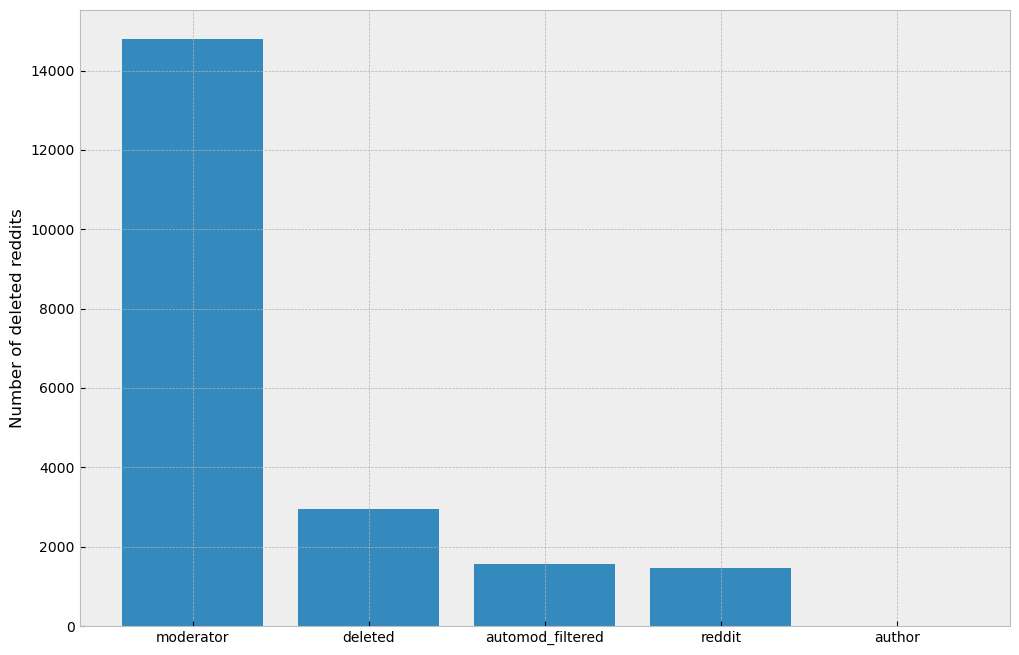

In [16]:
#Visualizing bar chart based of SQL output:

removed_by = grouped_df['removed_by'].tolist()
number_of_removed_posts = grouped_df['number_of_removed_posts'].tolist()

plt.figure(figsize=(12,8))
plt.ylabel("Number of deleted reddits")
plt.bar(removed_by, number_of_removed_posts)

plt.show()

>As we can see, the most deleted posts (68%) were removed by moderator. Less than 1% are deleted by authors.


**Who are the top 3 users who had the most their posts removed by moderator?**


In [17]:
q2 = """SELECT author, count(id) as number_of_removed_posts 
FROM df 
where removed_by = 'moderator' 
group by author 
order by 2 desc 
limit 3"""
print(ps.sqldf(q2, locals()))

           author  number_of_removed_posts
0    hornedviper9                       71
1  peter_mladenov                       35
2     ad55mul1994                       20


>Hornedviper is not a good user. 

**Let's find out how many posts with "virus" keyword are removed by moderator.
**

In [18]:
#Step 1: Getting proportion of all removed posts / removed "virus" posts
q3 = """
with Virus as (
SELECT id 
FROM df 
where removed_by = 'moderator' 
and title like '%virus%'
)

SELECT count(v.id) as virus_removed, count(d.id) as all_removed
FROM df d 
left join virus v on v.id = d.id 
where d.removed_by = 'moderator';"""

removed_moderator_df = ps.sqldf(q3, locals())

#print(type(removed_moderator_df))
print(removed_moderator_df.values)
print(removed_moderator_df.values[0])

[[ 1056 14789]]
[ 1056 14789]


In [19]:
#Step 2: getting % virus reddits from all removed posts:

virus_removed_id = removed_moderator_df.values[0][0]
all_removed_id = removed_moderator_df.values[0][1]


print(virus_removed_id/all_removed_id)

0.07140442220569342


> From all removed reddits by moderator, 12% posts contain the "virus" keyword.


## <a name="corr"></a>The most popular reddits

In [20]:
#Top 10 reddits with the most number of comments:

q4 = """SELECT title, num_comments as number_of_comments 
FROM df  
where title != 'data_irl'
order by 2 desc 
limit 10"""
print(ps.sqldf(q4, locals()))

                                               title  number_of_comments
0  The best (&amp; worst) countries for raising a...               12508
1            Police killing rates in G7 members [OC]               10425
2  [oc] How taboo and popular are sexual fetishes...               10396
3  Worst Episode Ever? The Most Commonly Rated Sh...                9217
4  The environmental impact of Beyond Meat and a ...                9120
5               What's getting cut in Trump's budget                8768
6      [OC] Mississippi, the Poorest State in the US                8703
7  [OC] Trump voters are less likely to have a co...                8354
8  [OC] Trending Google Searches by State Between...                8270
9  Almost all men are stronger than almost all wo...                7538


## <a name="corr"></a>The most common words in reddits:

Let's see the word map of the most commonly used words from reddit titles:

In [21]:
#To build a wordcloud, we have to remove NULL values first:
df["title"] = df["title"].fillna(value="")

In [22]:
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(df['title'].str.lower())

#word_string

(-0.5, 1599.5, 799.5, -0.5)

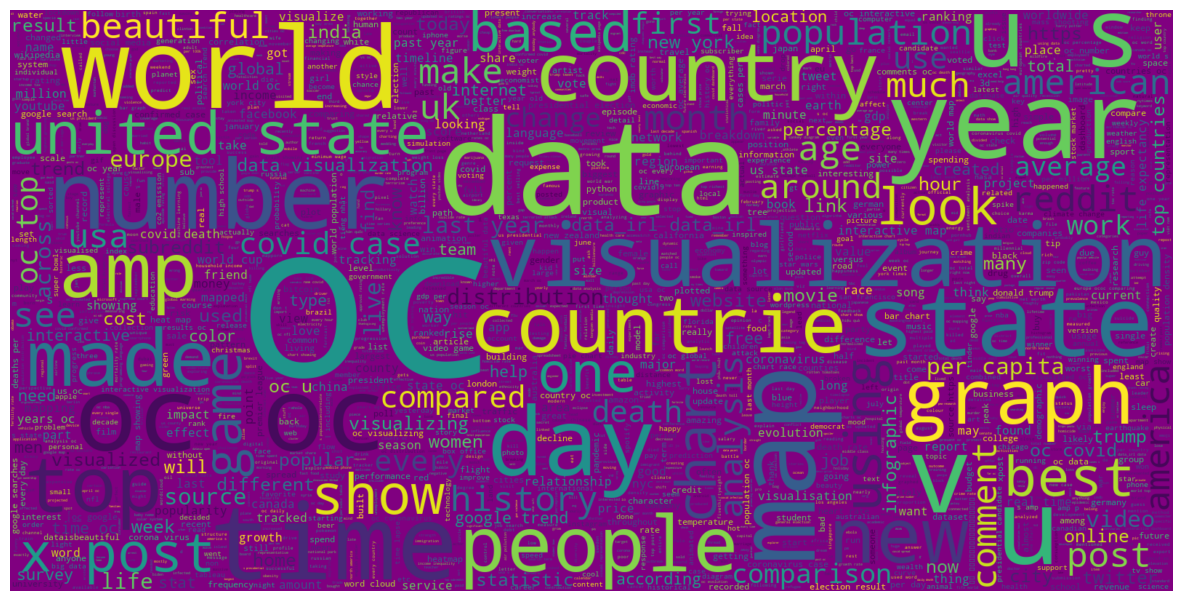

In [23]:
#And - plotting:

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

## <a name="corr"></a>Comments distribution


>The average reddit has less than 25 comments. Let's see the comment distribution for those reddits who have <25 comments:

C:\Users\gizzl\AppData\Local\Temp\ipykernel_2840\2455252396.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df[df["num_comments"] < 25]["num_comments"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)


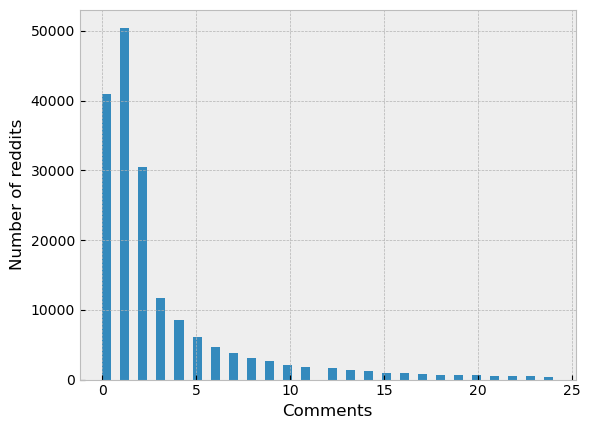

In [24]:
#Comments distribution plot:

fig, ax = plt.subplots()
_ = sns.distplot(df[df["num_comments"] < 25]["num_comments"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="num_comments", ylabel="id")

plt.ylabel("Number of reddits")
plt.xlabel("Comments")

plt.show()

>As we can see, the most reddits have less than 5 comments. 

## <a name="corr"></a>Correlation between dataset variables

Now let's see how the dataset variables are correlated with each other:
* How score and comments are correlated? 
* Do they increase and decrease together (positive correlation)? 
* Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

* Let's see the correlation table between our dataset variables (numerical and boolean variables only)

In [25]:
df.corr()

C:\Users\gizzl\AppData\Local\Temp\ipykernel_2840\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,score,total_awards_received,created_utc,num_comments,over_18
score,1.000000,0.330506,0.005262,0.574893,0.015676
total_awards_received,0.330506,1.000000,0.027446,0.168387,0.001456
created_utc,0.005262,0.027446,1.000000,0.029795,0.014476
num_comments,0.574893,0.168387,0.029795,1.000000,0.022924
over_18,0.015676,0.001456,0.014476,0.022924,1.000000


We see that score and number of comments are highly positively correlated with a correlation value of 0.6. 

There is some positive correlation of 0.2 between total awards received and score (0.2) and num_comments (0.1).

Now let's visualize the correlation table above using a heatmap


C:\Users\gizzl\AppData\Local\Temp\ipykernel_2840\3405909479.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


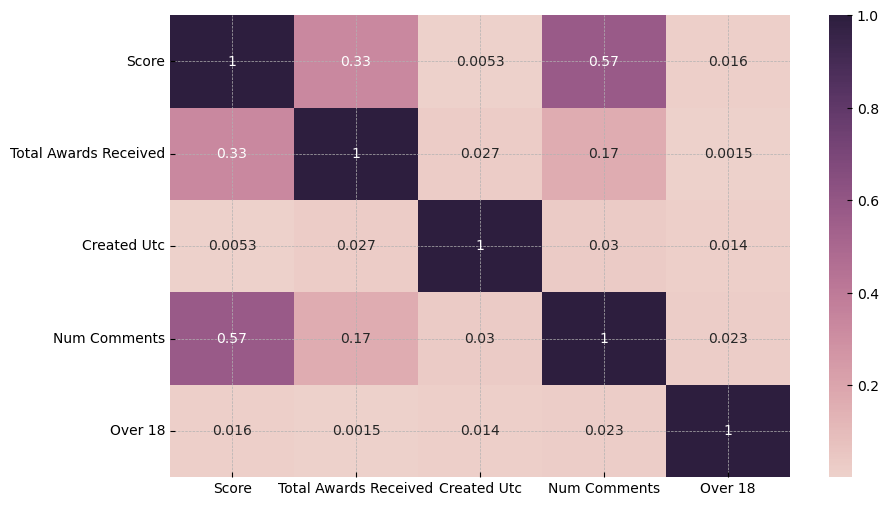

In [26]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

## <a name="corr"></a>Score distribution


In [27]:
df.score.describe()

count    190853.000000
mean        176.016159
std        1951.936524
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max      116226.000000
Name: score, dtype: float64

In [28]:
df.score.median()

1.0

C:\Users\gizzl\AppData\Local\Temp\ipykernel_2840\3022113631.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df[df["score"] < 22]["score"], kde=False, hist_kws={'alpha': 1}, ax=ax)


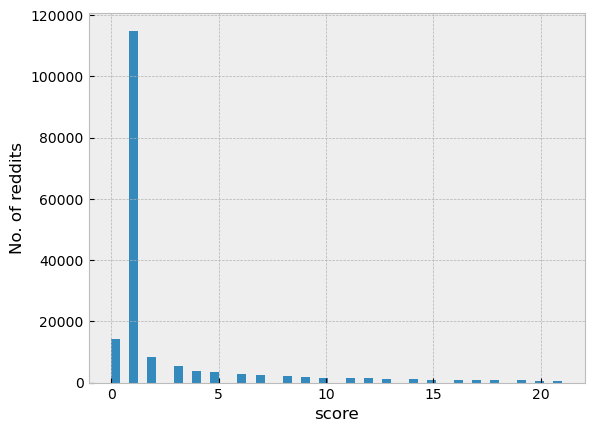

In [29]:
#Score distribution: 

fig, ax = plt.subplots()
_ = sns.distplot(df[df["score"] < 22]["score"], kde=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="score", ylabel="No. of reddits")